In [2]:
import sys
import glob
sys.path.append("../")
import CryoAsicAnalysis
import CryoAsicFile
import yaml
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use("~/evanstyle.mplstyle")

In [5]:
datapath = "../../../data/asicboard2-gXe-NoDewar-6-21-2024/"
datfiles = glob.glob(datapath+"*.dat")
pfiles = glob.glob(datapath+"*.p")

config_filepath = "../config/analysisconfig.yml"

In [11]:
#check if any dat files haven't been converted yet, and do so
#OR you can auto reload all files
reload_all = True
for df in datfiles:
    filetag = df.split("/")[-1]
    filetag = filetag.split(".")[0]
    found = False
    for pf in pfiles:
        pfiletag = pf.split("/")[-1]
        pfiletag = pfiletag.split(".")[0]
        if(pfiletag == filetag):
            found = True
            break
    
    #if no pickle matching file was found, do the conversion
    if(found == False or reload_all):
        cf = CryoAsicFile.CryoAsicFile(df, config_filepath)
        cf.load_raw_data()
        cf.group_into_pandas()
        outfile_name = datapath+filetag+".p"
        cf.pickle_dump_waveform_df(outfile_name)



Message
 <class 'IndexError'>
size [] previous size [12800016 16777218]
numberOfFrames read:  50
Finished reading raw binary, now descrambling the data
Done loading 50 CRYO ASIC events
Saving dataframe to file: ../../../data/asicboard2-gXe-NoDewar-6-21-2024/LongNoise_948_6g_12pt.p


In [13]:
infiles = glob.glob(datapath+"*.p")
infile = infiles[0]


ca = CryoAsicAnalysis.CryoAsicAnalysis(infile, config_filepath)

"""
#OR, you can do it this way to have better editing of individual elements of the config
#open the yaml config into a dict
with open(config_filepath, 'r') as f:
    config = yaml.safe_load(f)

config["gain"] = 1 #for example

ca = CryoAsicAnalysis.CryoAsicAnalysis(infile, config=config)
"""

ca.baseline_subtract()



loading the waveform dataframe from  ../../../data/asicboard2-gXe-NoDewar-6-21-2024/LongNoise_948_6g_12pt.p
Done loading


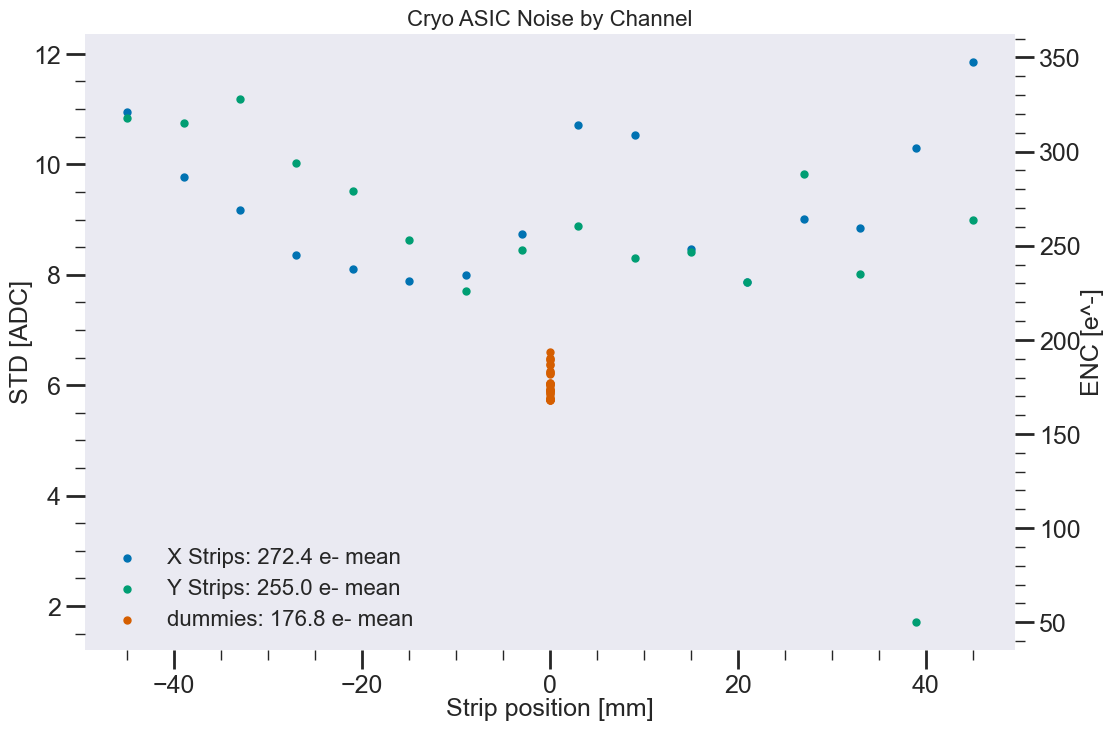

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Cryo ASIC Noise by Channel'}, xlabel='Strip position [mm]', ylabel='STD [ADC]'>)

In [20]:
ca.load_config(config_filepath)
ca.plot_stds_strip_position()

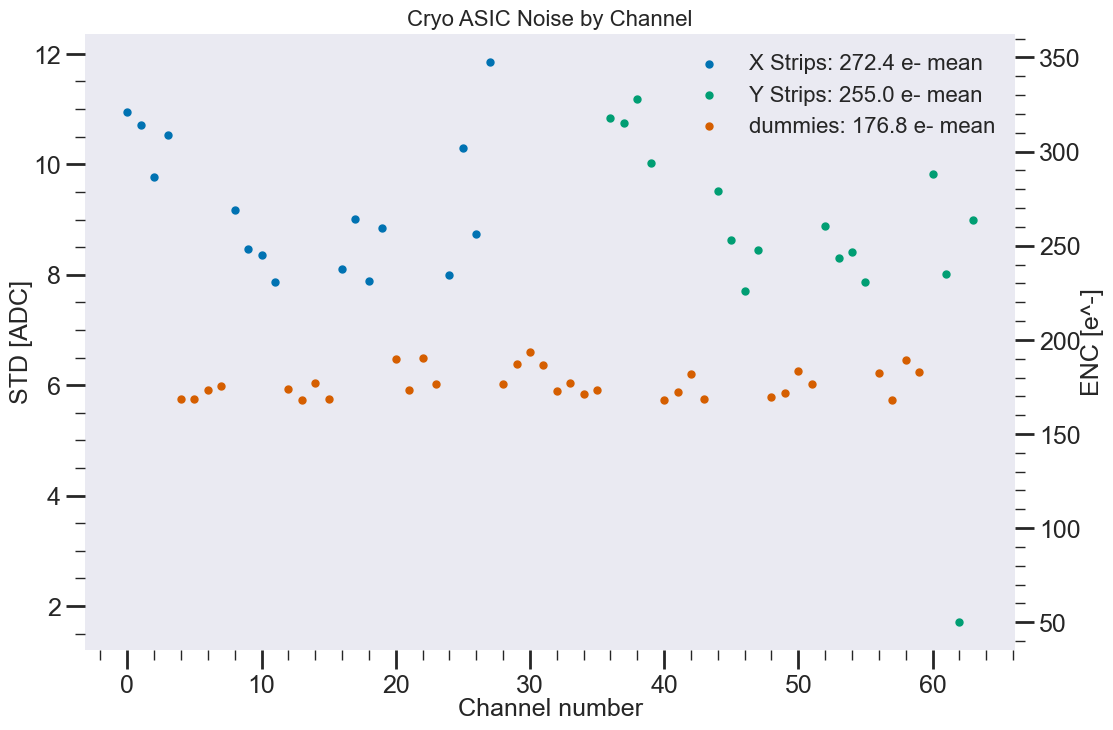

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Cryo ASIC Noise by Channel'}, xlabel='Channel number', ylabel='STD [ADC]'>)

In [22]:
ca.plot_stds()